In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
l = 0.25
m = 0.2 
M = 0.4
f = 0
g = 9.8

In [12]:
def koshi(teta):

    D = l*(M+m)-m*l*pow(np.cos(teta), 2)
    delta_teta = ((M+m)*g*np.sin(teta) - m*l*pow(teta, 2)*np.sin(teta)*np.cos(teta) - f*np.cos(teta))/D
    delta_x = (m*pow(l, 2)*pow(teta, 2)*np.sin(teta) - l*f - m*l*g*np.sin(teta)*np.cos(teta))/D

    return delta_teta, delta_x

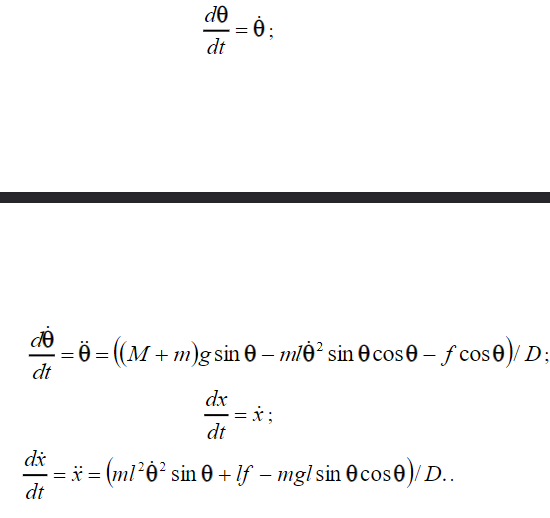
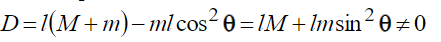

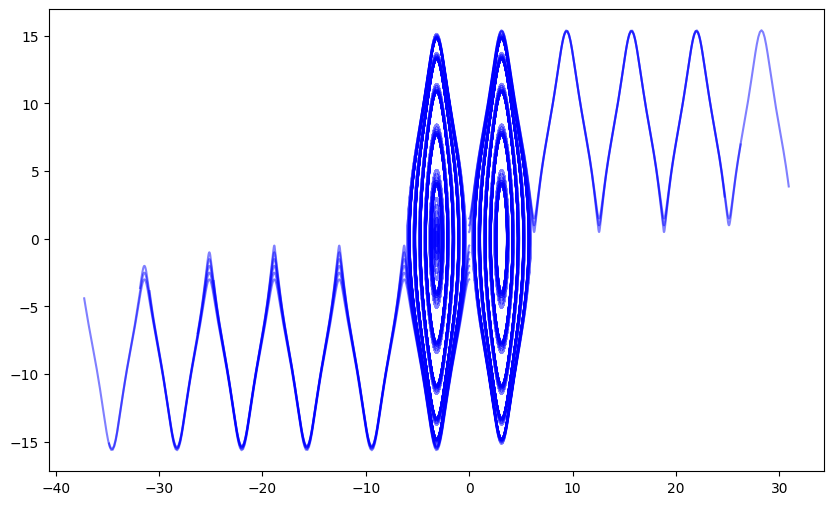

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


M = 0.4
m = 0.2
l = 0.25
g = 9.8
f = 0.0

def pendulum_ode(y, t):
    theta, dtheta, x, dx = y
    sin_theta = math.sin(theta)
    cos_theta = math.cos(theta)

    denominator = (M + m)*l - m*l*cos_theta**2

    ddtheta = ((M + m)*g*sin_theta - m*l*dtheta**2*sin_theta*cos_theta - f*cos_theta) / denominator
    ddx = (m*l**2*dtheta**2*sin_theta + l*f - m*g*l*sin_theta*cos_theta) / denominator

    return [dtheta, ddtheta, dx, ddx]

def calcODE(theta0, dtheta0, ts=10, nt=101):

    x0 = 0.0
    dx0 = 0.0

    initial_conditions = [theta0, dtheta0, x0, dx0]
    t = np.linspace(0, ts, nt)
    sol = odeint(pendulum_ode, initial_conditions, t)
    return sol

def drawPhasePortrait(deltaTheta=0.5, deltaDtheta=0.5, 
                     startTheta=-np.pi, stopTheta=np.pi, 
                     startDtheta=-5, stopDtheta=5, 
                     ts=10, nt=101,
                     xlim=None, ylim=None):
    plt.figure(figsize=(10, 6))


    startTheta = np.radians(startTheta)
    stopTheta = np.radians(stopTheta)
    deltaTheta = np.radians(deltaTheta)

    for theta0 in np.arange(startTheta, stopTheta, deltaTheta):
        for dtheta0 in np.arange(startDtheta, stopDtheta, deltaDtheta):
            sol = calcODE(theta0, dtheta0, ts, nt)
            plt.plot(sol[:, 0], sol[:, 1], 'b', alpha=0.5)
    plt.show()


drawPhasePortrait(deltaTheta=30, deltaDtheta=0.5, 
                 startTheta=-180, stopTheta=180,
                 startDtheta=-3, stopDtheta=2,
                 ts=5, nt=500,
                 xlim=[-2*np.pi, 2*np.pi], ylim=[-10, 10])

In [21]:
data = [57/180*np.pi, 0]

In [25]:
def simulate(data, func, t):
    log = [data[0]]
    for item in range(t):
        log.append(func(log[len(log)-1])[0])
    return log

In [44]:
log = simulate(data, koshi, 10)

In [45]:
log = np.nan_to_num(log, 0)

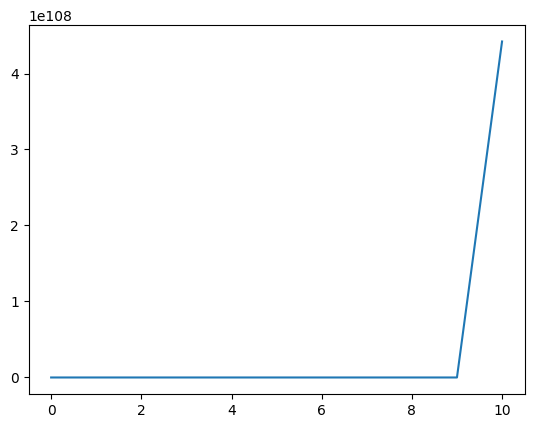

In [46]:
plt.plot(log)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [21]:
M = 0.4    
m = 0.2    
l = 0.25   
g = 9.8   

In [22]:
A = np.array([
    [0, 1, 0, 0],
    [(M+m)*g/(l*M), 0, 0, 0],
    [0, 0, 0, 1],
    [-m*g/M, 0, 0, 0]
])

B = np.array([[0], [-1/(l*M)], [0], [1/M]])
C = np.array([[0, 0, 1, 0]])
D = np.array([[0]])


In [24]:
C_ctrl = ct.ctrb(A, B)
C_ctrl

array([[   0. ,  -10. ,    0. , -588. ],
       [ -10. ,    0. , -588. ,    0. ],
       [   0. ,    2.5,    0. ,   49. ],
       [   2.5,    0. ,   49. ,    0. ]])

In [25]:
import sympy

In [28]:
m, M, l, g = sympy.symbols('m M l g')
s = sympy.symbols('s')

In [ ]:
W_o = 1/M*(s**2-g/l)/(s**2*(s**2-(M+m)/(l*M)*g))

In [30]:
a_1, a_2, a_3, a_0 = sympy.symbols('a_1, a_2, a_3, a_0')
b_1, b_2, b_0 = sympy.symbols('b_1, b_2, b_0')

In [33]:
W_p = (a_3*s**3+a_2*s**2+a_1*s+a_0) /\
      (s**3+b_2*s**2+b_1*s+b_0)

In [35]:
W_s = W_o/(1+W_o*W_p)

In [39]:
W_s

(-g/l + s**2)/(M*s**2*(1 + (-g/l + s**2)*(a_0 + a_1*s + a_2*s**2 + a_3*s**3)/(M*s**2*(s**2 - g*(M + m)/(M*l))*(b_0 + b_1*s + b_2*s**2 + s**3)))*(s**2 - g*(M + m)/(M*l)))

In [41]:
sympy.together(W_s)

(-g + l*s**2)*(b_0 + b_1*s + b_2*s**2 + s**3)/(s**2*(M*l*s**2 - g*(M + m))*(b_0 + b_1*s + b_2*s**2 + s**3) + (-g + l*s**2)*(a_0 + a_1*s + a_2*s**2 + a_3*s**3))

In [42]:
sympy.cancel(W_s)

(-b_0*g + b_0*l*s**2 - b_1*g*s + b_1*l*s**3 - b_2*g*s**2 + b_2*l*s**4 - g*s**3 + l*s**5)/(-M*b_0*g*s**2 + M*b_0*l*s**4 - M*b_1*g*s**3 + M*b_1*l*s**5 - M*b_2*g*s**4 + M*b_2*l*s**6 - M*g*s**5 + M*l*s**7 - a_0*g + a_0*l*s**2 - a_1*g*s + a_1*l*s**3 - a_2*g*s**2 + a_2*l*s**4 - a_3*g*s**3 + a_3*l*s**5 - b_0*g*m*s**2 - b_1*g*m*s**3 - b_2*g*m*s**4 - g*m*s**5)

In [43]:
p_des = (s+1)**7

In [50]:
D_s = 1/sympy.together(W_s)*(-g+l*s**2)*(b_0+b_1*s+b_2*s**2+s**3)

In [69]:
eq = sympy.Eq(D_s, p_des)
eq

Eq(s**2*(M*l*s**2 - g*(M + m))*(b_0 + b_1*s + b_2*s**2 + s**3) + (-g + l*s**2)*(a_0 + a_1*s + a_2*s**2 + a_3*s**3), (s + 1)**7)

In [70]:
solv = sympy.solve(eq, [a_1, a_2, a_3, a_0, b_1, b_2, b_0])
solv

[((-M*b_0*g*s**2 + M*b_0*l*s**4 - M*b_1*g*s**3 + M*b_1*l*s**5 - M*b_2*g*s**4 + M*b_2*l*s**6 - M*g*s**5 + M*l*s**7 - a_0*g + a_0*l*s**2 - a_2*g*s**2 + a_2*l*s**4 - a_3*g*s**3 + a_3*l*s**5 - b_0*g*m*s**2 - b_1*g*m*s**3 - b_2*g*m*s**4 - g*m*s**5 - (s + 1)**7)/(s*(g - l*s**2)),
  a_2,
  a_3,
  a_0,
  b_1,
  b_2,
  b_0)]

In [62]:
solv.subs([(M, m, l, g), (0.4, 0.2, 0.25, 9.8)])

AttributeError: 'list' object has no attribute 'subs'